# WeatherPy
---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
---

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

## Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [31]:
# Save config information
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

In [11]:
response = requests.get(url).json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 283.84,
  'feels_like': 279.22,
  'temp_min': 283.15,
  'temp_max': 284.82,
  'pressure': 998,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 6.21, 'deg': 257},
 'clouds': {'all': 0},
 'dt': 1603824221,
 'sys': {'type': 3,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1603781142,
  'sunset': 1603816968},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [32]:
# Print log of each city as it'sbeing processed
record = 0
set_num = 1
cities_with_data = []
print("""-----------------------------------
Beginning Data Retrieval 
-----------------------------------""")
for city in cities:
    city_url = f"{url}{city}&units=imperial"
    response = requests.get(city_url).json()
    try:
        city_name = response["name"]
        city_id = response["id"]
        print(f"Record {str(record)} of set {str(set_num)} | City number: {city_id} City name: {city_name}")
        cities_with_data.append(city) #list of the cities that have data
    except:
        print(f"{city} not found. Skipping..")
    record += 1
    if record == 50:
        set_num +=1
        record = 0
print("""-----------------------------------
Data Retrieval Complete
-----------------------------------""")

-----------------------------------
Beginning Data Retrieval 
-----------------------------------
Record 0 of set 1 | City number: 2074865 City name: Carnarvon
Record 1 of set 1 | City number: 5855927 City name: Hilo
Record 2 of set 1 | City number: 3366880 City name: Hermanus
Record 3 of set 1 | City number: 2075265 City name: Busselton
Record 4 of set 1 | City number: 5364271 City name: Laguna
Record 5 of set 1 | City number: 3372707 City name: Ribeira Grande
Record 6 of set 1 | City number: 5563839 City name: Fortuna
Record 7 of set 1 | City number: 3450832 City name: Ruy Barbosa
Record 8 of set 1 | City number: 3874787 City name: Punta Arenas
Record 9 of set 1 | City number: 3833367 City name: Ushuaia
Record 10 of set 1 | City number: 4031742 City name: Egvekinot
Record 11 of set 1 | City number: 6165406 City name: Thompson
Record 12 of set 1 | City number: 2155415 City name: New Norfolk
sentyabrskiy not found. Skipping..
Record 14 of set 1 | City number: 556268 City name: Ostrovno

Record 38 of set 3 | City number: 3412093 City name: Vestmannaeyjar
Record 39 of set 3 | City number: 2139521 City name: Noumea
Record 40 of set 3 | City number: 2125693 City name: Evensk
Record 41 of set 3 | City number: 2013279 City name: Vostok
Record 42 of set 3 | City number: 1568770 City name: Quang Ngai
hihifo not found. Skipping..
Record 44 of set 3 | City number: 3870243 City name: Taltal
Record 45 of set 3 | City number: 3440777 City name: Rocha
Record 46 of set 3 | City number: 2381972 City name: Adrar
Record 47 of set 3 | City number: 4791259 City name: Virginia Beach
Record 48 of set 3 | City number: 4035249 City name: Lufilufi
Record 49 of set 3 | City number: 1244926 City name: Hambantota
Record 0 of set 4 | City number: 3361934 City name: Saldanha
Record 1 of set 4 | City number: 2289549 City name: Duekoué
Record 2 of set 4 | City number: 380348 City name: Abū Zabad
grand river south east not found. Skipping..
Record 4 of set 4 | City number: 2112309 City name: Katsuura

Record 26 of set 6 | City number: 550512 City name: Kharovsk
Record 27 of set 6 | City number: 2017155 City name: Saskylakh
Record 28 of set 6 | City number: 1731248 City name: Alugan
Record 29 of set 6 | City number: 2108502 City name: Honiara
Record 30 of set 6 | City number: 5983720 City name: Iqaluit
Record 31 of set 6 | City number: 218680 City name: Boende
Record 32 of set 6 | City number: 1687894 City name: Santa Rosa
Record 33 of set 6 | City number: 2136825 City name: Isangel
Record 34 of set 6 | City number: 355449 City name: Esna
Record 35 of set 6 | City number: 2063042 City name: Port Hedland
Record 36 of set 6 | City number: 1538641 City name: Kedrovyy
burica not found. Skipping..
Record 38 of set 6 | City number: 5969025 City name: Haines Junction
Record 39 of set 6 | City number: 2152659 City name: Port Macquarie
Record 40 of set 6 | City number: 1796417 City name: Shahe
Record 41 of set 6 | City number: 2121025 City name: Srednekolymsk
Record 42 of set 6 | City number:

palabuhanratu not found. Skipping..
Record 14 of set 9 | City number: 2399001 City name: Mayumba
Record 15 of set 9 | City number: 1504380 City name: Kargat
Record 16 of set 9 | City number: 3533462 City name: Acapulco de Juárez
Record 17 of set 9 | City number: 70979 City name: Sayyan
Record 18 of set 9 | City number: 3421319 City name: Nuuk
Record 19 of set 9 | City number: 4453066 City name: Asheville
Record 20 of set 9 | City number: 5955084 City name: Foam Lake
Record 21 of set 9 | City number: 1819729 City name: Hong Kong
Record 22 of set 9 | City number: 3433899 City name: Formosa
Record 23 of set 9 | City number: 2189343 City name: Kaeo
Record 24 of set 9 | City number: 1267635 City name: Karwar
Record 25 of set 9 | City number: 1052373 City name: Beira
kegayli not found. Skipping..
Record 27 of set 9 | City number: 3393536 City name: Olinda
Record 28 of set 9 | City number: 2294915 City name: Takoradze
Record 29 of set 9 | City number: 2446796 City name: Bilma
Record 30 of set

Record 48 of set 11 | City number: 1622318 City name: Waingapu
Record 49 of set 11 | City number: 3463124 City name: Formosa do Rio Preto
naftah not found. Skipping..
tidore not found. Skipping..
Record 2 of set 12 | City number: 1495385 City name: Pelym
Record 3 of set 12 | City number: 286245 City name: Sur
Record 4 of set 12 | City number: 2123979 City name: Kuril'sk
Record 5 of set 12 | City number: 1337612 City name: Dhidhdhoo
Record 6 of set 12 | City number: 300640 City name: Şırnak
Record 7 of set 12 | City number: 6111862 City name: Port Hardy
Record 8 of set 12 | City number: 161616 City name: Balkanabat
Record 9 of set 12 | City number: 741045 City name: Orhangazi
Record 10 of set 12 | City number: 100926 City name: Umluj
Record 11 of set 12 | City number: 2445704 City name: Diffa
Record 12 of set 12 | City number: 3381538 City name: Grand-Santi
Record 13 of set 12 | City number: 1492466 City name: Shalinskoye
Record 14 of set 12 | City number: 3359638 City name: Walvis Bay


## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Retrive data for the DataFrame
city_n = []
cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities_with_data:
    city_url = f"{url}{city}&units=imperial"
    response = requests.get(city_url).json()
    city_n.append(response["name"])
    cloudiness.append(response["clouds"]["all"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    humidity.append(response["main"]["humidity"])
    lat.append(response["coord"]["lat"])
    lng.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    wind_speed.append(response["wind"]["speed"])

#Create the DataFrame
weather_df = pd.DataFrame({"City": city_n, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                          "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
# Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1603824066,88,-24.87,113.63,68.00,20.80
1,Hilo,20,US,1603824066,78,19.73,-155.09,77.00,4.70
2,Hermanus,100,ZA,1603823929,90,-34.42,19.23,63.00,3.00
3,Busselton,66,AU,1603823933,96,-33.65,115.33,60.01,9.78
4,Laguna,0,US,1603824067,31,38.42,-121.42,66.99,1.01


In [8]:
#Export the city data into a .csv
weather_df.to_csv(output_data_file)

In [9]:
pd.to_datetime(weather_df["Date"])

0     1970-01-01 00:00:01.603824066
1     1970-01-01 00:00:01.603824066
2     1970-01-01 00:00:01.603823929
3     1970-01-01 00:00:01.603823933
4     1970-01-01 00:00:01.603824067
                   ...             
532   1970-01-01 00:00:01.603824236
533   1970-01-01 00:00:01.603824237
534   1970-01-01 00:00:01.603824237
535   1970-01-01 00:00:01.603824237
536   1970-01-01 00:00:01.603824237
Name: Date, Length: 537, dtype: datetime64[ns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

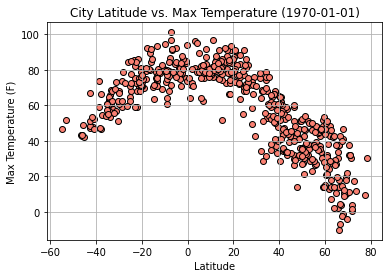

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], facecolors="salmon", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (1970-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

###  Latitude vs. Humidity Plot

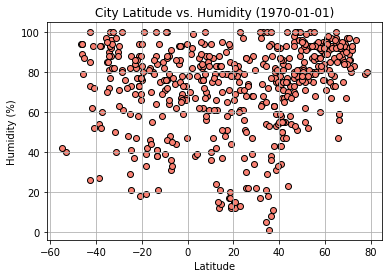

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], facecolors="salmon", edgecolor="black")
plt.title("City Latitude vs. Humidity (1970-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

###  Latitude vs. Cloudiness Plot

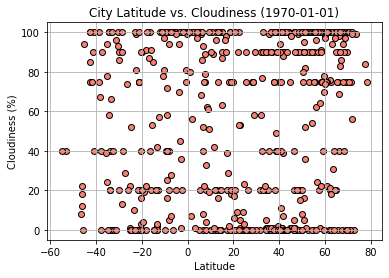

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], facecolors="salmon", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (1970-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

###  Latitude vs. Wind Speed Plot

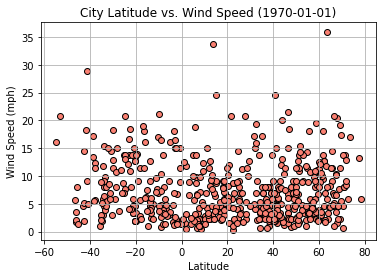

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], facecolors="salmon", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (1970-01-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_vs_WindSpeed.png")
plt.show()

##  Linear Regression

In [33]:
# Create Northern Hemisphere DataFrame
city_n = []
cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities_with_data:
    city_url = f"{url}{city}&units=imperial"
    response = requests.get(city_url).json()
    if (response["coord"]["lat"] >= 0):
        city_n.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
northern_df = pd.DataFrame({"City": city_n, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                          "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1603826414,74,19.73,-155.09,78.80,3.36
1,Laguna,1,US,1603826415,25,38.42,-121.42,70.00,4.70
2,Ribeira Grande,40,PT,1603826415,68,38.52,-28.70,64.40,10.16
3,Fortuna,20,US,1603826282,31,40.60,-124.16,64.40,3.36
4,Egvekinot,98,RU,1603826416,92,66.32,-179.17,17.82,4.74


In [35]:
# Create Southern Hemisphere DataFrame
city_n = []
cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities_with_data:
    city_url = f"{url}{city}&units=imperial"
    response = requests.get(city_url).json()
    if (response["coord"]["lat"] < 0):
        city_n.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
southern_df = pd.DataFrame({"City": city_n, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                          "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1603826413,88,-24.87,113.63,68.00,20.80
1,Hermanus,100,ZA,1603826414,91,-34.42,19.23,62.01,1.99
2,Busselton,66,AU,1603826414,97,-33.65,115.33,60.01,9.78
3,Ruy Barbosa,100,BR,1603826416,75,-12.28,-40.49,78.04,5.06
4,Punta Arenas,40,CL,1603826416,40,-53.15,-70.92,51.80,20.80


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7631073859069721


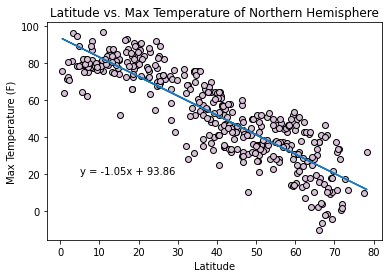

In [44]:
#Calculate the linear regression model Northern Hemisphere - Max Temp vs. Latitude
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
northern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, northern_df["Predict"])
plt.annotate(line_eq, (5,20))
plt.title("Latitude vs. Max Temperature of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6217300141607243


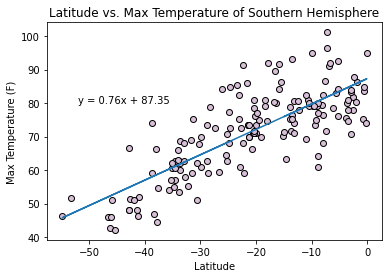

In [49]:
#Calculate the linear regression model Southern Hemisphere - Max Temp vs. Latitude
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
southern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, southern_df["Predict"])
plt.annotate(line_eq, (-52,80))
plt.title("Latitude vs. Max Temperature of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.121001387903344


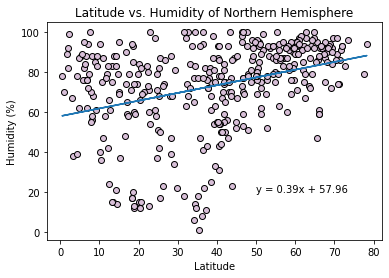

In [51]:
#Calculate the linear regression model Northern Hemisphere - Humidity vs. Latitude
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
northern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, northern_df["Predict"])
plt.annotate(line_eq, (50,20))
plt.title("Latitude vs. Humidity of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01607843779889161


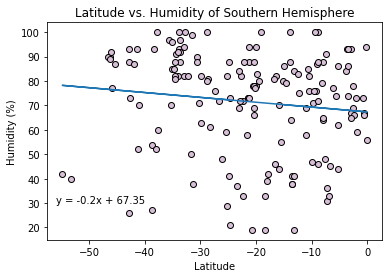

In [54]:
#Calculate the linear regression model Southern Hemisphere - Humidity vs. Latitude
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
southern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, southern_df["Predict"])
plt.annotate(line_eq, (-56,30))
plt.title("Latitude vs. Humidity of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.031015296088210954


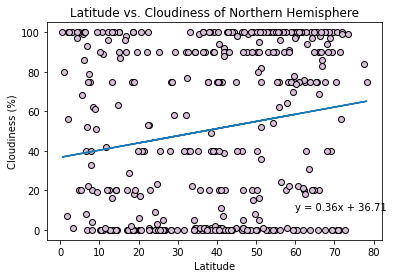

In [59]:
#Calculate the linear regression model Northern Hemisphere - Cloudiness vs. Latitude
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
northern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, northern_df["Predict"])
plt.annotate(line_eq, (60,10))
plt.title("Latitude vs. Cloudiness of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008488890080757702


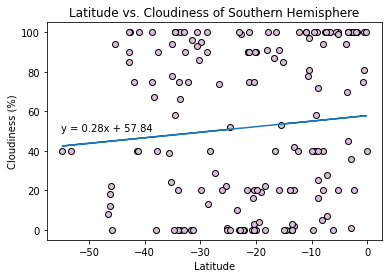

In [64]:
#Calculate the linear regression model Southern Hemisphere - Cloudiness vs. Latitude
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
southern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, southern_df["Predict"])
plt.annotate(line_eq, (-55,50))
plt.title("Latitude vs. Cloudiness of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012262943397890315


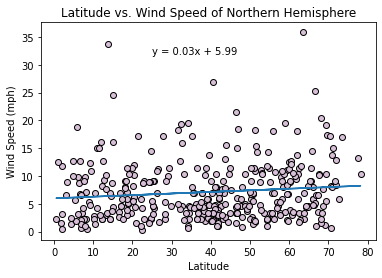

In [69]:
#Calculate the linear regression model Northern Hemisphere - Wind Speed vs. Latitude
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
northern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, northern_df["Predict"])
plt.annotate(line_eq, (25,32))
plt.title("Latitude vs. Wind Speed of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007627901102042591


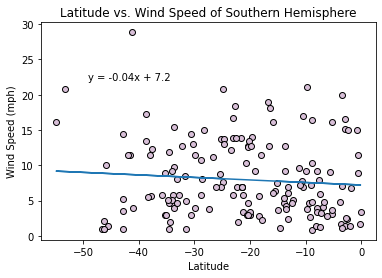

In [71]:
#Calculate the linear regression model Southern Hemisphere - Wind Speed vs. Latitude
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The r-squared is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
southern_df["Predict"] = predict
plt.scatter(x_values, y_values, facecolors="thistle", edgecolor="black")
plt.plot(x_values, southern_df["Predict"])
plt.annotate(line_eq, (-49,22))
plt.title("Latitude vs. Wind Speed of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()